In [1]:
import numpy as np
import pandas as pd


In [2]:
HeartDiseaseData=pd.read_csv ('C:/Users/amrita/Downloads/heart.csv')

In [3]:
print('data before removing duplicates', HeartDiseaseData.shape)
HeartDiseaseData=HeartDiseaseData.drop_duplicates()
print('data after removing duplicates', HeartDiseaseData.shape)

data before removing duplicates (303, 14)
data after removing duplicates (302, 14)


In [6]:
HeartDiseaseData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age         302 non-null int64
sex         302 non-null int64
cp          302 non-null int64
trestbps    302 non-null int64
chol        302 non-null int64
fbs         302 non-null int64
restecg     302 non-null int64
thalach     302 non-null int64
exang       302 non-null int64
oldpeak     302 non-null float64
slope       302 non-null int64
ca          302 non-null int64
thal        302 non-null int64
target      302 non-null int64
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
HeartDiseaseData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
HeartDiseaseData.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
 HeartDiseaseData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# creating a bar chart of the target variable as categorical

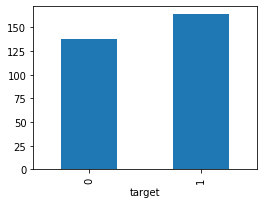

In [8]:
%matplotlib inline
import matplotlib.pyplot as PlotObject
GroupedData=HeartDiseaseData.groupby('target').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [15]:
HeartDiseaseData.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

# visualizing all the numeric predictors using histogram

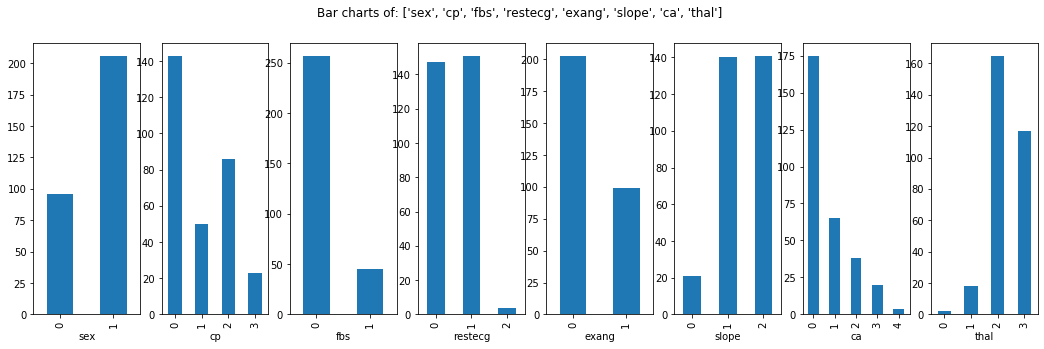

In [17]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    import matplotlib.pyplot as PlotObject
        # Generating multiple subplots
    fig, subPlot=PlotObject.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=HeartDiseaseData, colsToPlot=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000689F465C8>,
      dtype=object)

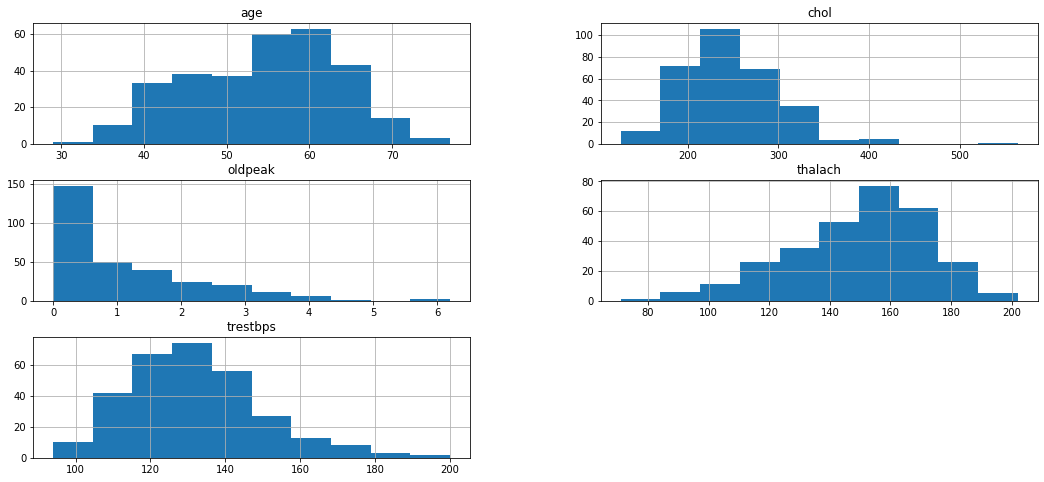

In [10]:
HeartDiseaseData.hist(['age','trestbps','chol','thalach','oldpeak'], figsize=(18,8))

# Categorical Vs Continuous
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

In [20]:
GroupedData=HeartDiseaseData.groupby(['target'])
GroupedData.mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


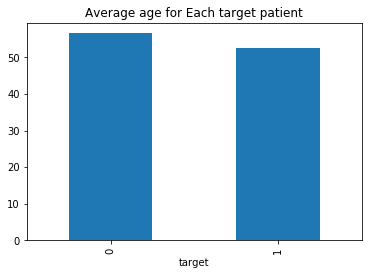

In [21]:
GroupedData.mean()['age'].plot(kind='bar', title='Average age for Each target patient')

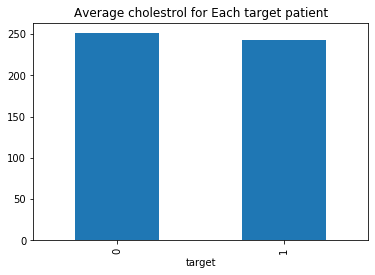

In [22]:
GroupedData.mean()['chol'].plot(kind='bar', title='Average cholestrol for Each target patient')

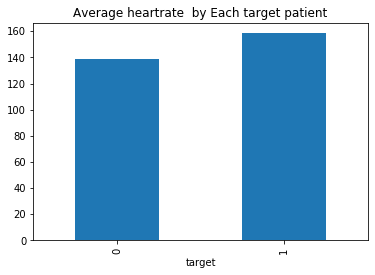

In [23]:
GroupedData.mean()['thalach'].plot(kind='bar', title='Average heartrate  by Each target patient')

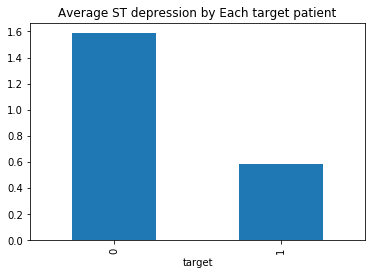

In [24]:
GroupedData.mean()['oldpeak'].plot(kind='bar', title='Average ST depression by Each target patient')

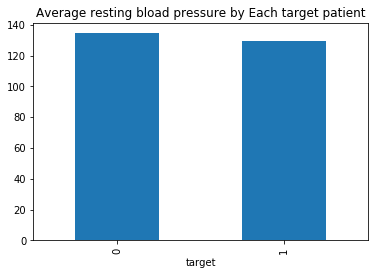

In [25]:
GroupedData.mean()['trestbps'].plot(kind='bar', title='Average resting bload pressure by Each target patient')

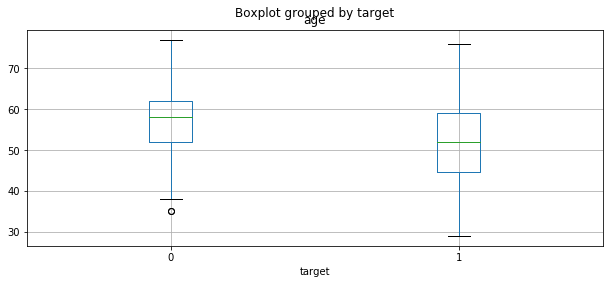

In [17]:
HeartDiseaseData.boxplot(column='age', by='target', figsize=(10,4), vert=True)

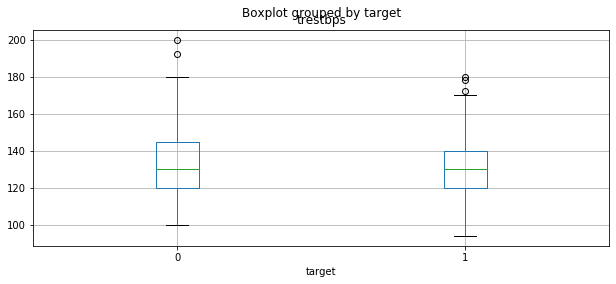

In [18]:
HeartDiseaseData.boxplot(column='trestbps', by='target', figsize=(10,4), vert=True)

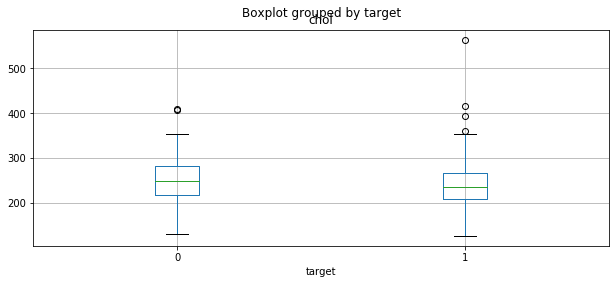

In [19]:
HeartDiseaseData.boxplot(column='chol', by='target', figsize=(10,4), vert=True)

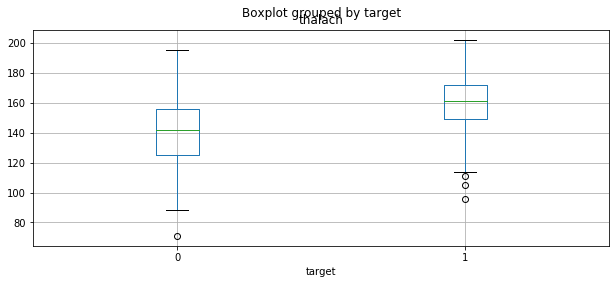

In [20]:
HeartDiseaseData.boxplot(column='thalach', by='target', figsize=(10,4), vert=True)

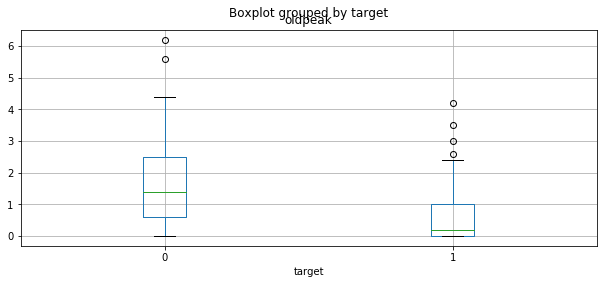

In [21]:
HeartDiseaseData.boxplot(column='oldpeak', by='target', figsize=(10,4), vert=True)

# Outlier Treatment

In [22]:
HeartDiseaseData[HeartDiseaseData['chol']>500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [23]:
HeartDiseaseData['chol'][HeartDiseaseData['chol']>500] = 400

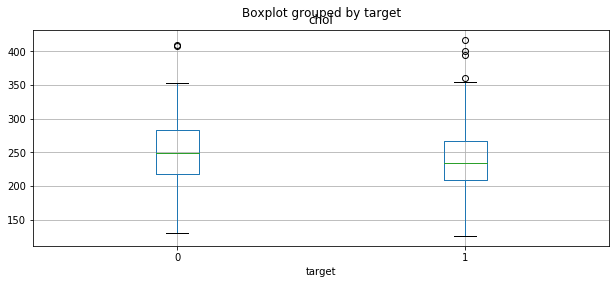

In [24]:
HeartDiseaseData.boxplot(column='chol', by='target', figsize=(10,4), vert=True)

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

In [70]:
from scipy.stats import f_oneway

# Assumption(H0) is that chol and target are correlated with each other
Survived_0=HeartDiseaseData['chol'][HeartDiseaseData['target']==0]
Survived_1=HeartDiseaseData['chol'][HeartDiseaseData['target']==1]
AnovaResults = f_oneway(Survived_0, Survived_1)

print('P-Value for Anova is: ', AnovaResults[1])


P-Value for Anova is:  0.15803697464249503


# Relationship exploration: Categorical Vs Categorical
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [26]:
#sex(0=female,1=male)
CrossTabResult=pd.crosstab(index=HeartDiseaseData['sex'], columns=HeartDiseaseData['target'])
CrossTabResult

target,0,1
sex,,
0,24,72
1,114,92


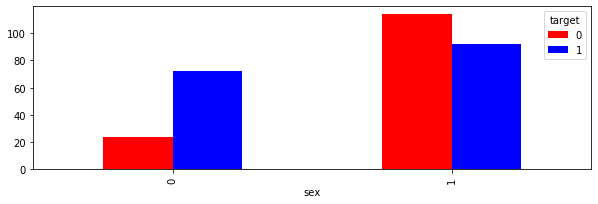

In [28]:
# Visual Inference using Grouped Bar chart
# Notice that Male suffer heart disease is very high compared to Female
CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

# Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test
Chi-Square test is conducted to check the correlation between two categorical variables

In [29]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1]) 

The P-Value of the ChiSq Test is: 1.5508552054949547e-06


In [30]:
CrossTabResult=pd.crosstab(index=HeartDiseaseData['cp'], columns=HeartDiseaseData['target'])
CrossTabResult

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


In [31]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1]) 

The P-Value of the ChiSq Test is: 1.8926838351935918e-17


In [31]:
CrossTabResult=pd.crosstab(index=HeartDiseaseData['fbs'], columns=HeartDiseaseData['target'])
CrossTabResult

target,0,1
fbs,,
0,116,141
1,22,23


In [32]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1]) 

The P-Value of the ChiSq Test is: 0.7611374700928197


In [33]:
CrossTabResult=pd.crosstab(index=HeartDiseaseData['restecg'], columns=HeartDiseaseData['target'])
CrossTabResult


target,0,1
restecg,,
0,79,68
1,56,95
2,3,1


In [34]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.007713053269318974


In [37]:
CrossTabResult=pd.crosstab(index=HeartDiseaseData['exang'], columns=HeartDiseaseData['target'])
CrossTabResult

target,0,1
exang,,
0,62,141
1,76,23


In [38]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 9.556466486179178e-14


In [39]:
CrossTabResult=pd.crosstab(index=HeartDiseaseData['slope'], columns=HeartDiseaseData['target'])
CrossTabResult


target,0,1
slope,,
0,12,9
1,91,49
2,35,106


In [40]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 6.577782760917924e-11


In [41]:
CrossTabResult=pd.crosstab(index=HeartDiseaseData['ca'], columns=HeartDiseaseData['target'])
CrossTabResult


target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,3


In [42]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 3.771038067427657e-15


In [44]:
CrossTabResult=pd.crosstab(index=HeartDiseaseData['thal'], columns=HeartDiseaseData['target'])
CrossTabResult

target,0,1
thal,,
0,1,1
1,12,6
2,36,129
3,89,28


In [45]:
from scipy.stats import chi2_contingency
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 3.146295138318122e-18


# Correlation

In [55]:
CorrelationData=HeartDiseaseData.corr()
CorrelationData

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [69]:
CorrelationData['target'][abs(CorrelationData['target']) > 0.5 ]

target    1.0
Name: target, dtype: float64

In [56]:
HeartDiseaseDataNumeric=pd.get_dummies(HeartDiseaseData)
HeartDiseaseDataNumeric.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Machine Learning

In [67]:
HeartDiseaseDataNumeric.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [57]:
TargetVariable='target'
Predictors=['sex', 'cp','fbs','restecg','exang','slope','ca','thal']

X=HeartDiseaseDataNumeric[Predictors].values
y=HeartDiseaseDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(241, 8)
(241,)
(61, 8)
(61,)


# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1,penalty='l1', solver='liblinear')
print(clf)
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[26  3]
 [ 7 25]]
Accuracy of the model: 0.84


,sex,cp,fbs,restecg,exang,slope,ca,thal,target,Predictedtarget
0,1,0,0,1,1,1,1,3,0,0
1,1,2,0,1,1,1,0,3,0,0
2,1,2,1,1,0,2,1,3,1,1
3,1,1,0,1,1,1,3,1,0,0
4,0,2,1,0,0,2,1,2,1,1


# Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

[[26  3]
 [ 3 29]]
Accuracy of the model: 0.90


,sex,cp,fbs,restecg,exang,slope,ca,thal,TargetColumn,Predictedtarget
0,1,0,0,1,1,1,1,3,0,0
1,1,2,0,1,1,1,0,3,0,0
2,1,2,1,1,0,2,1,3,1,1
3,1,1,0,1,1,1,3,1,0,0
4,0,2,1,0,0,2,1,2,1,1


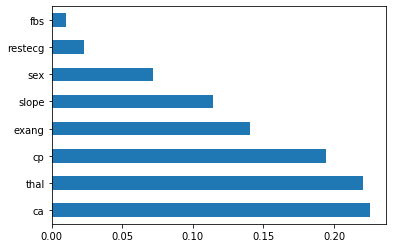

In [62]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, n_estimators=200,criterion='entropy')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

# AdaBoost

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

,sex,cp,fbs,restecg,exang,slope,ca,thal,TargetColumn,Predictedtarget
0,1,0,0,1,1,1,1,3,0,0
1,1,2,0,1,1,1,0,3,0,0
2,1,2,1,1,0,2,1,3,1,1
3,1,1,0,1,1,1,3,1,0,0
4,0,2,1,0,0,2,1,2,1,1


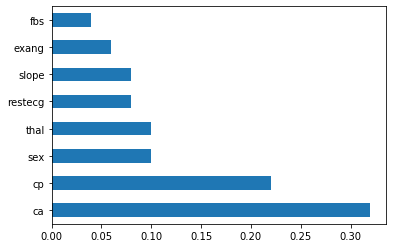

In [38]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=50, base_estimator=DTC ,learning_rate=1)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

# XGBoost

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=False, verbosity=None)
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

[[26  3]
 

,sex,cp,fbs,restecg,exang,slope,ca,thal,TargetColumn,Predictedtarget
0,1,0,0,1,1,1,1,3,0,0
1,1,2,0,1,1,1,0,3,0,0
2,1,2,1,1,0,2,1,3,1,1
3,1,1,0,1,1,1,3,1,0,0
4,0,2,1,0,0,2,1,2,1,1


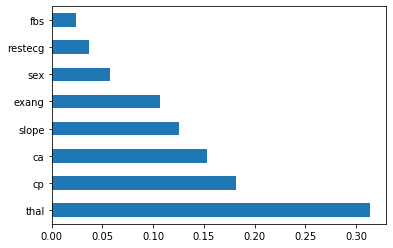

In [39]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

# KNN

In [63]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.68      0.90      0.78        29
           1       0.87      0.62      0.73        32

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61

[[26  3]
 [12 20]]
Accuracy of the model: 0.75


,sex,cp,fbs,restecg,exang,slope,ca,thal,TargetColumn,Predictedtarget
0,1,0,0,1,1,1,1,3,0,0
1,1,2,0,1,1,1,0,3,0,1
2,1,2,1,1,0,2,1,3,1,1
3,1,1,0,1,1,1,3,1,0,0
4,0,2,1,0,0,2,1,2,1,1


# SVM

In [64]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

[[24  5]
 [ 6 26]]
Accuracy of the model: 0.82


,sex,cp,fbs,restecg,exang,slope,ca,thal,TargetColumn,Predictedtarget
0,1,0,0,1,1,1,1,3,0,0
1,1,2,0,1,1,1,0,3,0,0
2,1,2,1,1,0,2,1,3,1,1
3,1,1,0,1,1,1,3,1,0,0
4,0,2,1,0,0,2,1,2,1,1


# Naive Bayes

In [65]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.classification_report(y_test, prediction).split()[-2]
print('Accuracy of the model:', F1_Score)

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Predicted'+ TargetVariable]=prediction
TestingDataResults.head()

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

[[25  4]
 [ 8 24]]
Accuracy of the model: 0.80


,sex,cp,fbs,restecg,exang,slope,ca,thal,TargetColumn,Predictedtarget
0,1,0,0,1,1,1,1,3,0,0
1,1,2,0,1,1,1,0,3,0,0
2,1,2,1,1,0,2,1,3,1,1
3,1,1,0,1,1,1,3,1,0,0
4,0,2,1,0,0,2,1,2,1,1
